In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

import joblib
import warnings
warnings.filterwarnings('ignore')

In [8]:
pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00


In [2]:
pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [2]:
from pycaret.regression import *

In [3]:
pip install explainerdashboard

In [4]:
df = pd.read_csv('tehranhouses.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [5]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1527,87,2,False,False,True,Pardis,585000000,19500.00
3014,75,2,True,True,True,Parand,385000000,12833.33
2581,92,2,False,True,True,Kazemabad,3000000000,100000.00
785,125,3,True,True,True,Shahran,5550000000,185000.00
2075,58,1,True,True,True,Shahrake Gharb,3400000000,113333.33


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df = df.drop('Price(USD)', axis='columns')

In [8]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000


In [9]:
setup(df, target='Price', session_id=85, remove_outliers=True)

,Description,Value
0,Session id,85
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3479, 7)"
4,Transformed data shape,"(3357, 7)"
5,Transformed train set shape,"(2313, 7)"
6,Transformed test set shape,"(1044, 7)"
7,Numeric features,1
8,Categorical features,2
9,Rows with missing values,0.7%


In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1817845651.8962,33520492428413251584.0000,5407713658.5829,0.5387,0.5174,0.4342,0.5680
lightgbm,Light Gradient Boosting Machine,1850921321.3913,33901565924708720640.0000,5473993494.4639,0.5246,0.4909,0.4263,0.5840
xgboost,Extreme Gradient Boosting,1771836329.8145,33832566452259270656.0000,5487361668.0116,0.5216,0.5159,0.4102,1.6800
gbr,Gradient Boosting Regressor,1869615141.1658,32771862574859378688.0000,5452077188.9199,0.5211,0.5212,0.4816,0.3700
rf,Random Forest Regressor,1834918436.3653,35106093936664793088.0000,5550384845.2397,0.5137,0.5014,0.4146,0.9710
knn,K Neighbors Regressor,2037384969.1831,37218050169226051584.0000,5751097217.5036,0.4773,0.5647,0.5148,0.2440
lar,Least Angle Regression,2601293634.3637,36766956164225085440.0000,5814135285.2164,0.4616,0.9709,1.0037,0.2400
llar,Lasso Least Angle Regression,2601293634.5707,36766956168881340416.0000,5814135285.5933,0.4616,0.9709,1.0037,0.2490
lasso,Lasso Regression,2601293634.5707,36766956168881344512.0000,5814135285.5933,0.4616,0.9709,1.0037,0.2630
lr,Linear Regression,2601293596.6446,36766956118745452544.0000,5814135279.4149,0.4616,0.9709,1.0037,2.5380


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=85)

In [12]:
my_model = create_model("xgboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2436407273.8361,52291336693315387392.0000,7231274900.9642,0.4934,0.6176,0.5137
1,1794569562.2295,47927108893652246528.0000,6922940769.1856,0.4853,0.4728,0.3674
2,1438751017.8033,19944802001693495296.0000,4465960367.2327,0.5474,0.5287,0.5112
3,1848169644.2295,51038057330683944960.0000,7144092477.7528,0.3295,0.5467,0.3775
4,1939670195.7377,36721244317009088512.0000,6059805633.5999,0.4617,0.4852,0.3741
5,2389075966.6955,52432015637687451648.0000,7240995486.6501,0.3583,0.5344,0.4125
6,1986535318.4527,51242994435216367616.0000,7158421225.0479,0.4293,0.4705,0.3673
7,1348971514.4033,11585914177489559552.0000,3403808775.1061,0.5758,0.4715,0.3761
8,1515775913.0041,11929439687114321920.0000,3453902095.7628,0.6574,0.4999,0.4015


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   object
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(2), object(2)
memory usage: 119.0+ KB


In [14]:
df.describe()

,Room,Price
count,3479.000000,3.479000e+03
mean,2.079908,5.359023e+09
std,0.758275,8.099935e+09
min,0.000000,3.600000e+06
25%,2.000000,1.418250e+09
50%,2.000000,2.900000e+09
75%,2.000000,6.000000e+09
max,5.000000,9.240000e+10


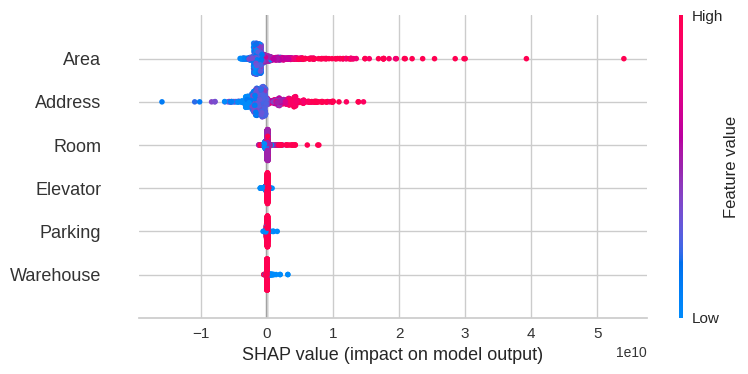

In [15]:
interpret_model(my_model)

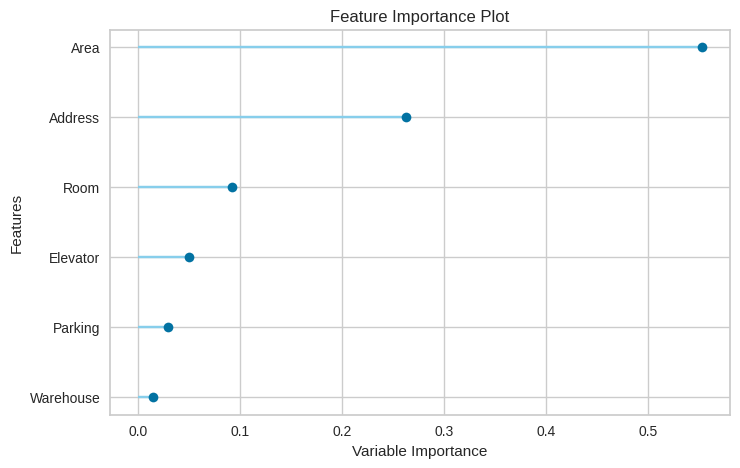

In [16]:
plot_model(estimator= my_model, plot='feature')

In [17]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   int64 
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(3), object(1)
memory usage: 119.0+ KB


In [19]:
df.shape

(3479, 7)

In [20]:
df.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,23
Price,0


In [21]:
df.dropna(inplace=True)

In [22]:
df['Parking'].value_counts(normalize=True)* 100

,proportion
Parking,
True,84.751157
False,15.248843


In [23]:
pd.crosstab(df.Parking, df.Room)

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [24]:
below_85 = df[df.Area <= 85]
len(below_85)

1522

In [25]:
df[df.Area <= 85]['Parking'].value_counts()

,count
Parking,
True,1104
False,418


In [26]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [27]:
len(df.Address.unique())

192

In [28]:
df.Price.mean()

5379956886.600405

In [29]:
df.groupby('Room')['Price'].mean()

,Price
Room,
0,7.860500e+09
1,1.707481e+09
2,3.330303e+09
3,1.093869e+10
4,2.560033e+10
5,3.373439e+10


In [30]:
pd.set_option('display.float_format', lambda x: '%.f'% x)

In [31]:
room_parking_mean_df = df.groupby( ['Room', 'Parking'] )['Price'].mean().reset_index()
room_parking_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [32]:
df2 = df.copy()

In [33]:
df2.loc[:, 'Price'] = df['Price'].map('{:,.0f}'.format)

In [34]:
df2.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
1765,105,2,True,True,True,Pardis,"750,000,000"
1212,105,3,True,True,True,Parand,"1,260,000,000"
291,192,3,True,True,True,Marzdaran,"12,670,000,000"
2489,98,2,True,True,True,Pardis,"790,000,000"
290,112,2,True,True,True,Shahr-e-Ziba,"3,680,000,000"


<Figure size 800x500 with 0 Axes>

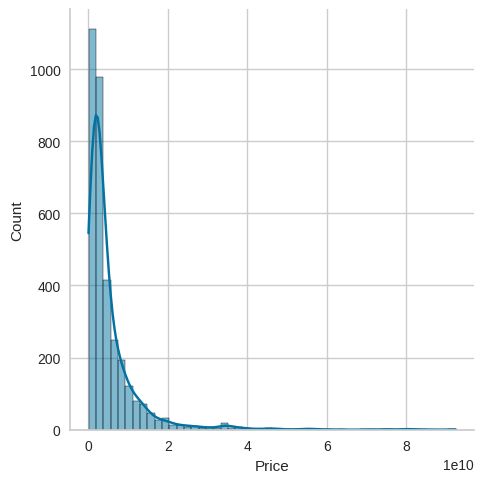

In [35]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'], bins=50, kde=True)

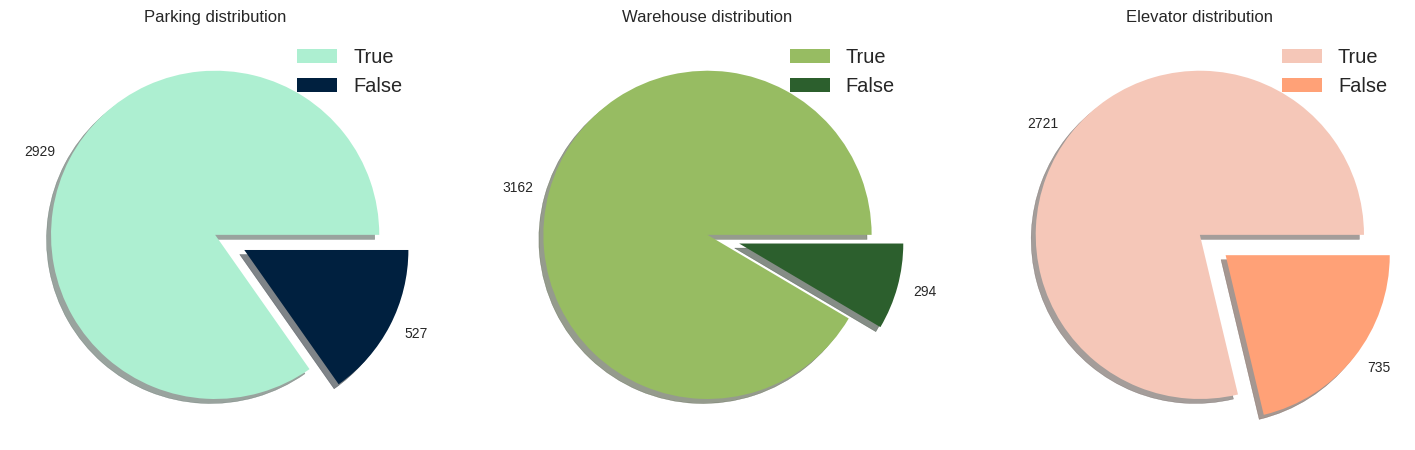

In [36]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']

for i in range(3):
  data = df[columns[i]].value_counts()
  ax[i].pie(data, labels=data.values, explode=explode, colors= colors[i], shadow=True)
  ax[i].legend(labels=data.index, fontsize='large')
  ax[i].set_title('{} distribution'.format(columns[i]))

In [37]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]

Text(0.5, 1.0, 'number of flats in location')

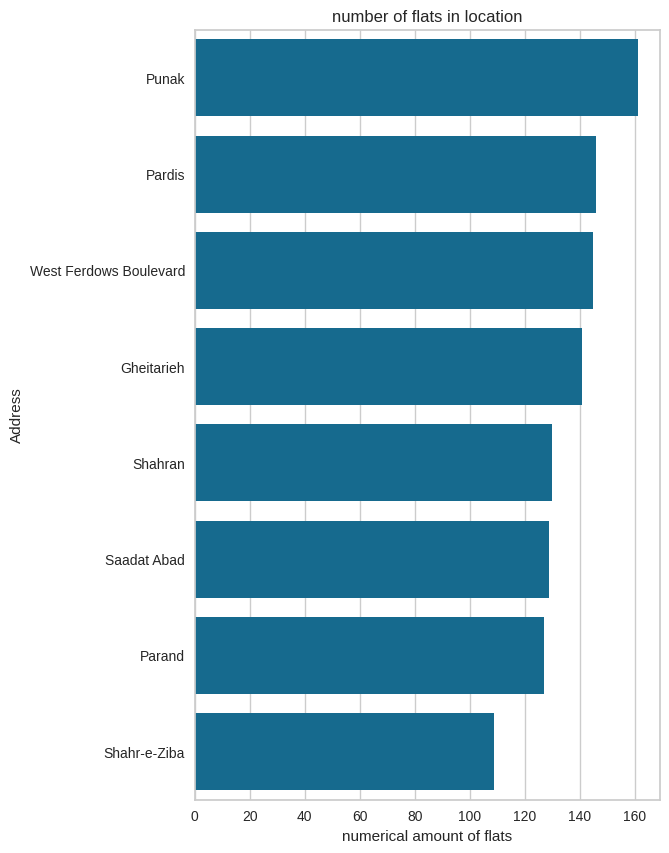

In [38]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index, ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('number of flats in location')

In [39]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

In [40]:
df.sort_values('Price', ascending=False)[['Address']].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


In [41]:
df.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,0
Price,0


In [42]:
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


<Axes: xlabel='Price'>

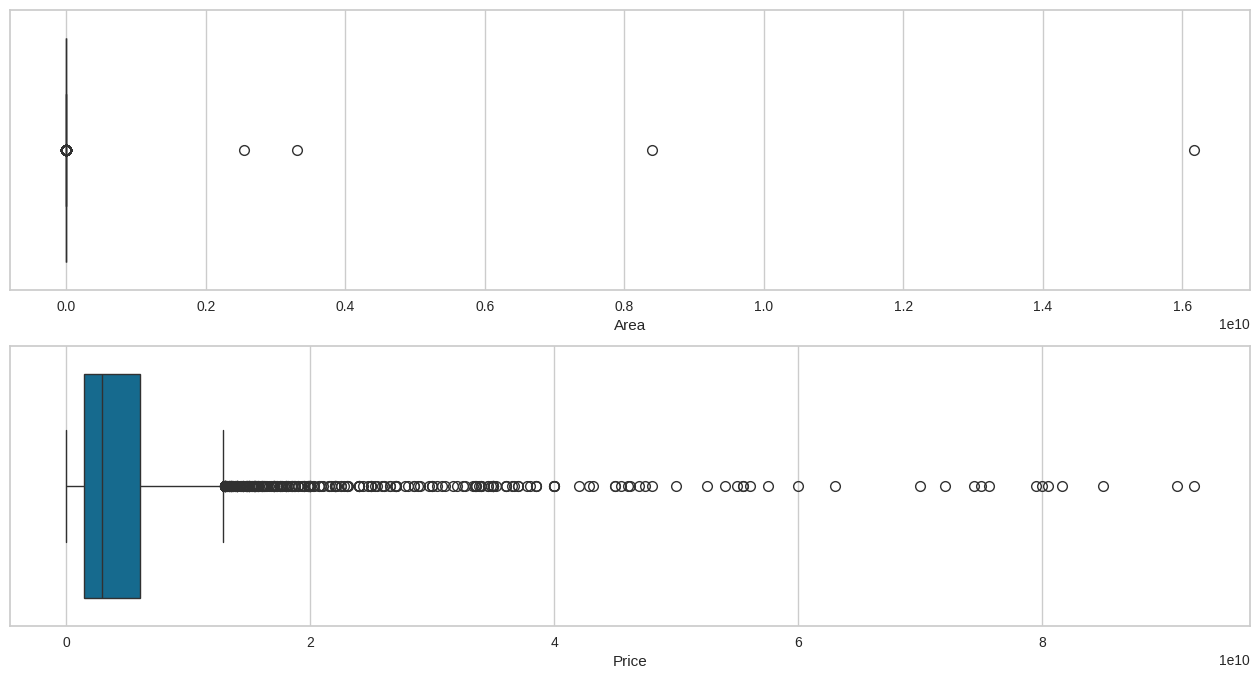

In [43]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])

In [44]:
def lower_upper(x):
  Q1 = np.percentile(x, 25)
  Q3 = np.percentile(x, 75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f'Lower limit for area: {lower_area:0.2f}')
print(f'Upper limit for area: {upper_area:0.2f}')
print(f'Lower limit for price: {lower_price:,}')
print(f'Upper limit for price: {upper_price:,}')

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [45]:
area_outlier = np.where(df['Area'] > upper_area)
price_outlier = np.where(df['Price'] > upper_price)
total_outlier = np.union1d(area_outlier, price_outlier)

print(f"Number of area outliers: {len(df.iloc[area_outlier])}")
print(f"Number of price outliers: {len(df.iloc[price_outlier])}")
print(f"Number of outliers: {len(df.iloc[total_outlier])}")

Number of area outliers: 237
Number of price outliers: 310
Number of outliers: 366


In [46]:
df.shape

(3456, 7)

In [47]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index=True, right_index=True)
df_final.drop(columns='Address', inplace=True)
df_final.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,902500000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,1,1,1,7000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
X = df_final.drop(columns = 'Price')
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2764, 197)
shape of y train: (2764,)
shape of x test: (692, 197)
shape of y train: (692,)


In [49]:
def parametr_finder(model, parameters):

  start =time.time()

  grid = GridSearchCV(model,
                      param_grid= parameters,
                      refit = True,
                      cv= KFold(shuffle=True, random_state=1),
                      n_jobs= -1)
  grid_fit = grid.fit(X_train, y_train)
  y_pred_train = grid_fit.predict(X_train)
  y_pred = grid_fit.predict(X_test)

  train_score = grid_fit.score(X_train, y_train)
  test_score = grid_fit.score(X_test, y_test)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

  model_name = str(model).split('(')[0]

  end = time.time()

  print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
  print("--" * 10)
  print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
  print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
  print(f"RMSE is {RMSE:,} for {model_name} model.")
  print("--" * 10)
  print(f"Runtime of the program is: {end - start:0.2f}")


  return train_score, test_score, RMSE

In [50]:
er = ExtraTreesRegressor(random_state=1)
param_er = {
    'n_estimators': [64,80],
    'max_depth': [6,7,8],
}

er_train_score, er_test_score, er_RMSE = parametr_finder(er, param_er)

The best parameters for ExtraTreesRegressor model is: {'max_depth': 8, 'n_estimators': 64}
--------------------
(R2 score) in the training set is 86.90% for ExtraTreesRegressor model.
(R2 score) in the testing set is 70.77% for ExtraTreesRegressor model.
RMSE is 5,032,671,267.227089 for ExtraTreesRegressor model.
--------------------
Runtime of the program is: 26.49


In [51]:
lr = LinearRegression(n_jobs = -1)

lr_train_score, lr_test_score, lr_RMSE = parametr_finder(lr, {})

The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 60.40% for LinearRegression model.
(R2 score) in the testing set is 53.35% for LinearRegression model.
RMSE is 6,357,973,671.712957 for LinearRegression model.
--------------------
Runtime of the program is: 0.35


In [52]:
ridge = Ridge(random_state = 1)
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parametr_finder(ridge, param_ridge)

The best parameters for Ridge model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Ridge model.
(R2 score) in the testing set is 53.36% for Ridge model.
RMSE is 6,357,553,945.624987 for Ridge model.
--------------------
Runtime of the program is: 0.70


In [53]:
lasso = Lasso(random_state = 1)
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parametr_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Lasso model.
(R2 score) in the testing set is 53.35% for Lasso model.
RMSE is 6,357,953,517.829563 for Lasso model.
--------------------
Runtime of the program is: 17.09


In [54]:
eln = ElasticNet(random_state = 1)
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
            'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}

eln_train_score, eln_test_score, eln_RMSE = parametr_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.7}
--------------------
(R2 score) in the training set is 59.51% for ElasticNet model.
(R2 score) in the testing set is 55.36% for ElasticNet model.
RMSE is 6,219,838,182.729824 for ElasticNet model.
--------------------
Runtime of the program is: 41.67


In [55]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = parametr_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
(R2 score) in the training set is 97.91% for DecisionTreeRegressor model.
(R2 score) in the testing set is 71.37% for DecisionTreeRegressor model.
RMSE is 4,980,876,315.211948 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 3.60


In [56]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [3,4,5],
            'min_samples_leaf': [3,4],
            'n_estimators': [200,256],

             }

rfr_train_score, rfr_test_score, rfr_RMSE = parametr_finder(rfr, param_rfr)

The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 200}
--------------------
(R2 score) in the training set is 79.24% for RandomForestRegressor model.
(R2 score) in the testing set is 73.03% for RandomForestRegressor model.
RMSE is 4,834,317,893.100265 for RandomForestRegressor model.
--------------------
Runtime of the program is: 173.41


In [57]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 20, 30],
            'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parametr_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'uniform'}
--------------------
(R2 score) in the training set is 60.39% for KNeighborsRegressor model.
(R2 score) in the testing set is 63.99% for KNeighborsRegressor model.
RMSE is 5,586,254,776.237762 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 4.73


In [58]:
xgboost = XGBRegressor(n_jobs = -1)
param_xgboost = {'n_estimators': [64,128],
             'learning_rate': [0.1,0.075],
             'subsample': [0.25],
             'colsample_bytree': [1,2],
             'max_depth': [4,5],
             'gamma': [0]}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parametr_finder(xgboost, param_xgboost)

The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.075, 'max_depth': 4, 'n_estimators': 128, 'subsample': 0.25}
--------------------
(R2 score) in the training set is 88.15% for XGBRegressor model.
(R2 score) in the testing set is 74.36% for XGBRegressor model.
RMSE is 4,713,647,474.125338 for XGBRegressor model.
--------------------
Runtime of the program is: 121.10


In [59]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, rfr_train_score, knr_train_score,xgboost_train_score,er_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, rfr_test_score, knr_test_score,xgboost_test_score,er_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, rfr_RMSE, knr_RMSE,xgboost_RMSE,er_RMSE]},
                             index = ['LinearRegression', 'Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor','XGBoostRegressor','Extra Trees Regresor'])

models_score

,Training score,Testing score,RMSE
LinearRegression,1,1,6357973672
Ridge,1,1,6357553946
Lasso,1,1,6357953518
ElasticNet,1,1,6219838183
DecisionTreeRegressor,1,1,4980876315
RandomForestRegressor,1,1,4834317893
KNeighborsRegressor,1,1,5586254776
XGBoostRegressor,1,1,4713647474
Extra Trees Regresor,1,1,5032671267


In [60]:
pip install wandb

In [61]:
import wandb

In [62]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [65]:
er = ExtraTreesRegressor(max_depth= 8, n_estimators= 64, random_state=1)
lr = LinearRegression(n_jobs = -1)
ridge = Ridge(alpha= 0.001, random_state=1)
lasso = Lasso(alpha= 0.001, random_state=1)
eln = ElasticNet(alpha= 0.001, l1_ratio= 0.7, random_state = 1)
dtr = DecisionTreeRegressor(min_samples_leaf= 1, min_samples_split= 3, random_state = 1)
rfr = RandomForestRegressor(min_samples_leaf= 4, min_samples_split= 3, n_estimators= 200, random_state = 1, n_jobs = -1)
knr = KNeighborsRegressor(n_neighbors= 20, weights= 'uniform', n_jobs = -1)
xgboost = XGBRegressor(colsample_bytree= 1, gamma= 0, learning_rate= 0.075, max_depth= 4, n_estimators= 128, subsample= 0.25, n_jobs = -1)

In [66]:
models = [er, lr, ridge, lasso, eln, dtr, rfr, knr, xgboost]
model_names = ['er', 'lr', 'ridge', 'lasso', 'eln', 'dtr', 'rfr', 'knr', 'xgboost']

In [67]:
for model, name in zip(models, model_names):

    wandb.init(project="tehran-house-price", name=name, reinit=True, settings=wandb.Settings(init_timeout=120))

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))

    wandb.log({
        "train_mse": train_mse,
        "test_mse": test_mse,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "RMSE": RMSE
    })

RMSE,▁
test_mse,▁
test_r2,▁
train_mse,▁
train_r2,▁
RMSE,4106375961.27077
test_mse,1.686232353530241e+19
test_r2,0.80542
train_mse,1.4040551034394706e+18
train_r2,0.97684


RMSE,▁
test_mse,▁
test_r2,▁
train_mse,▁
train_r2,▁
RMSE,5032671267.22709
test_mse,2.532778008397311e+19
test_r2,0.70774
train_mse,7.944359082556412e+18
train_r2,0.86898


RMSE,▁
test_mse,▁
test_r2,▁
train_mse,▁
train_r2,▁
RMSE,6357973671.71296
test_mse,4.042382921019514e+19
test_r2,0.53355
train_mse,2.4014269211458187e+19
train_r2,0.60397


RMSE,▁
test_mse,▁
test_r2,▁
train_mse,▁
train_r2,▁
RMSE,6357553945.62499
test_mse,4.041849217153184e+19
test_r2,0.53361
train_mse,2.4014271492596666e+19
train_r2,0.60397


RMSE,▁
test_mse,▁
test_r2,▁
train_mse,▁
train_r2,▁
RMSE,6357953517.82956
test_mse,4.042357293488132e+19
test_r2,0.53355
train_mse,2.4014269211397464e+19
train_r2,0.60397


RMSE,▁
test_mse,▁
test_r2,▁
train_mse,▁
train_r2,▁
RMSE,6219838182.72982
test_mse,3.868638701934384e+19
test_r2,0.55359
train_mse,2.4550142698725585e+19
train_r2,0.59513


RMSE,▁
test_mse,▁
test_r2,▁
train_mse,▁
train_r2,▁
RMSE,4980876315.21195
test_mse,2.4809128867439354e+19
test_r2,0.71372
train_mse,1.2666977269437716e+18
train_r2,0.97911


RMSE,▁
test_mse,▁
test_r2,▁
train_mse,▁
train_r2,▁
RMSE,4834317893.10026
test_mse,2.337062949154938e+19
test_r2,0.73032
train_mse,1.2590427622291372e+19
train_r2,0.79236


RMSE,▁
test_mse,▁
test_r2,▁
train_mse,▁
train_r2,▁
RMSE,5586254776.23776
test_mse,3.1206242425039213e+19
test_r2,0.63991
train_mse,2.4019005078025593e+19
train_r2,0.60389


In [69]:
model_path = 'model.joblib'
joblib.dump(knr, model_path)

['model.joblib']